In [42]:
import pandas as pd
%matplotlib inline 
import numpy as np
from scipy.stats import lognorm, norm
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import scipy.stats as stats

In [43]:
#getting sigma, loc, scale, 3 parameters for log normal fitting for EV and AB from each file

def lognorm_single(x, amp1, mu1, sigma1,loc1):
    return amp1 * lognorm.pdf(x, sigma1,loc=loc1, scale=np.exp(mu1))

# def lognorm_2amp(x, amp1, amp2):
    
#     return amp1 * lognorm.pdf(x, sigma1,loc1, scale=np.exp(mu1)) + amp2 * lognorm.pdf(x, sigma2, loc2, scale=np.exp(mu2))


   Full Field of View Channel 1-Channel 2 Merged Clusters,,,,,,,,,,,,,,,,,
0   Analysis performed using binned counts\n,,,,,,...                     
1                                   ,,,,,,,,,,,,,,,,,                     
2   channel name,positivity condition,min binned c...                     
3   Channel 1,min <= count <= max,3,10000000,,,,,,...                     
4   Channel 2,min <= count <= max,3,10000000,,,,,,...                     
5                                   ,,,,,,,,,,,,,,,,,                     
6   ,population phenotypes,number of clusters,,,,,...                     
7         single positive,Channel 1,55,,,,,,,,,,,,,,,                     
8         single positive,Channel 2,67,,,,,,,,,,,,,,,                     
9   double positive,"Channel 1, Channel 2",4,,,,,,...                     
10        ,total positive clusters,126,,,,,,,,,,,,,,,                     
11  0 clusters were negative for all channels,,,,,...                     
12                       

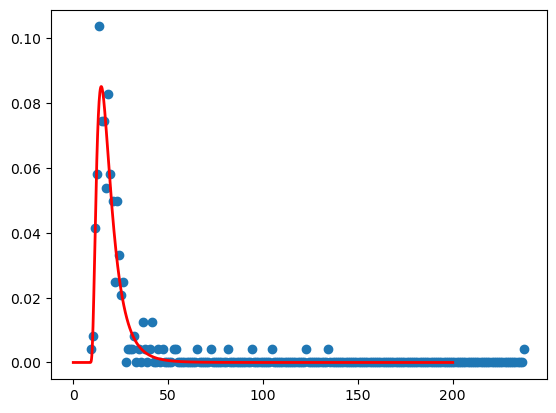

R-squared value: 0.9355570805630066


In [44]:
#AB fitting with curve_fit, bins need to be 200!
# df=pd.read_table(r'~/Desktop/codi data/troubleshooting/20230427 tim4 b1 c1/pbs/20230427 tim4 pbs AB total.csv')

# df=pd.read_table(r'~/Desktop/codi data/troubleshooting/20230407 ev profiler kit/control cd9 cd81/wash twice/total.csv')
#df=pd.read_table(r'~/Desktop/codi data/troubleshooting/bridgette data/4.13.2023 Tim4 ONI EV/20230413 tim4 control ab total.csv')
df=pd.read_table(r'~/Desktop/codi data/troubleshooting/20230421 tim4 sonicate ab d10/ab/20230421 tim4 control ab total.csv')


print(df.head(15))

#discard headers
df_new = df.loc[13:] # 14 for single file, 13 for 'total' file
#print(df_new.head()) #debug
#df1=df_new.columns.str.split(',', expand=True)
df1=df_new[df_new.columns[0]].str.split(',', expand=True)
df1.columns = df1.iloc[0]
df1=df1.drop(df1.index[0])
df1=df1.reset_index(drop=True)
df1 = df1[df1.columns].astype(float)

rslt_df = df1[(df1['Channel 1 binned counts'] >= 3 )& (df1['Channel 2 binned counts'] < 3)]  #channel 2 positive
radius = rslt_df['radius_of_gyration']
print('interested particle numbers for channel 2 positive')
print(len(radius))
print('median radius of interested particle numbers')
print(radius.median())


data1 = radius
hist, bin_edges = np.histogram(data1, bins=200, density=True) #200/50, R2 value varies a lot. smaller bins, higher R2

print(len(hist))
print(len(bin_edges))

p0 = [0.5, 0.5, 1, 1]
# p0 = [0.1, 0.1, 0.1, 0.1]

params, cov = curve_fit(lognorm_single, (bin_edges[0:-1]+bin_edges[1:])/2, hist, p0=p0, 
                         maxfev=5000000)#lower bound for loc1 needs to be 0?
print(params)
# Plot the fitted distribution
x = np.linspace(0, 200, 1000)
plt.scatter((bin_edges[0:-1]+bin_edges[1:])/2,hist)
#plt.hist(data, bins=50, density=True, alpha=0.5)
plt.plot(x, lognorm_single(x, *params), 'r-', lw=2)
plt.show()

# Evaluate the fit using the R-squared value

residuals = hist - lognorm_single((bin_edges[0:-1]+bin_edges[1:])/2, *params)
ss_res = np.sum(residuals**2)
ss_tot = np.sum((hist - np.mean(hist))**2)
r_squared = 1 - (ss_res / ss_tot)
print("R-squared value:", r_squared)
amp11, mu1, sigma1,loc1=params

interested particle numbers for double positive
4518
median radius of interested particle numbers
46.180283
50
51
[ 0.971514    3.55731583  0.71527233 11.66525106]


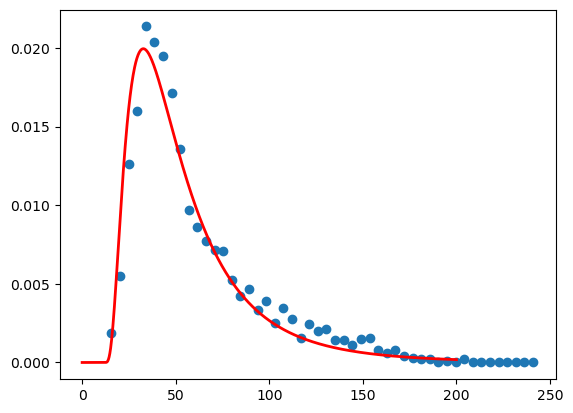

R-squared value: 0.9795377398213811


In [45]:
#EV

df=pd.read_table(r'~/Desktop/codi data/troubleshooting/20230421 tim4 sonicate ab d10/ab/oni ev ab total.csv')
# df=pd.read_table(r'~/Desktop/codi data/troubleshooting/20230407 ev profiler kit/oni ev cd9 cd81/wash twice/total.csv')
# df=pd.read_table(r'~/Desktop/codi data/troubleshooting/bridgette data/4.11.2023 EV Profiler Kit Coverslips/total.csv')
# df=pd.read_table(r'~/Desktop/codi data/troubleshooting/20230427 tim4 b1 c1/B1/20230427 tim4 B1 ONI total.csv')

df_new = df.loc[13:] # 14 for single file, 13 for 'total' file
#print(df_new.head()) #debug
#df1=df_new.columns.str.split(',', expand=True)
df1=df_new[df_new.columns[0]].str.split(',', expand=True)
df1.columns = df1.iloc[0]
df1=df1.drop(df1.index[0])
df1=df1.reset_index(drop=True)
df1 = df1[df1.columns].astype(float)

rslt_df = df1[(df1['Channel 1 binned counts'] >= 3 )& (df1['Channel 2 binned counts'] >= 3)]  #channel 2 positive
radius = rslt_df[rslt_df['radius_of_gyration']<300]['radius_of_gyration']
# radius = rslt_df['radius_of_gyration']


print('interested particle numbers for double positive')
print(len(radius))
print('median radius of interested particle numbers')
print(radius.median())
max_v= radius.max()
bin_width=20
#print(max_v//bin_width), bins=int(max_v//bin_width)
#ax=radius.plot.hist(bins=30, alpha=0.8, range=[0, 300], edgecolor='white')
#ax.set_xlabel("Radius of gyration (nm)")

#EV fitting with curve_fit
data1 = radius
hist, bin_edges = np.histogram(data1, bins=50, density=True)#??? 50,200 for bins
plt.show()
print(len(hist))
print(len(bin_edges))
plt.scatter(bin_edges[1:],hist)

# def lognorm_single(x, amp1, mu1, sigma1,loc1):
#     return amp1 * lognorm.pdf(x, sigma1,loc=loc1, scale=np.exp(mu1))


p0 = [0.5, 0.1, 0.5, 1]
#EV 0.4724248605768506, -3.596856227862146, 61.243074679025185
#AB 0.9679158514759685, 8.258868875990352, 12.906846685651438
# params, cov = curve_fit(lognorm_single, (bin_edges[0:-1]+bin_edges[1:])/2, hist, p0=p0, 
#                          bounds=((0, 0, 0, 0), (1, 10, 10, 10)), maxfev=5000000)#lower bound for loc1 needs to be 0?
params, cov = curve_fit(lognorm_single, (bin_edges[0:-1]+bin_edges[1:])/2, hist, p0=p0, 
                         maxfev=5000000)#lower bound for loc1 needs to be 0?
print(params)
# Plot the fitted distribution
x = np.linspace(0, 200, 1000)
#plt.hist(data, bins=50, density=True, alpha=0.5)
plt.plot(x, lognorm_single(x, *params), 'r-', lw=2)
plt.show()

# Evaluate the fit using the R-squared value

residuals = hist - lognorm_single((bin_edges[0:-1]+bin_edges[1:])/2, *params)
ss_res = np.sum(residuals**2)
ss_tot = np.sum((hist - np.mean(hist))**2)
r_squared = 1 - (ss_res / ss_tot)
print("R-squared value:", r_squared)
amp22, mu2, sigma2,loc2=params
# 2.6609697869657927 0.3613032404730958 3.3965137872852895 3.4943059650019217 0.9058518009214995 17.443493949998697

In [46]:
#getting sigma, loc, scale, 3 parameters for log normal fitting for EV and AB from each file

# def lognorm_single(x, amp1, mu1, sigma1,loc1):
#     return amp1 * lognorm.pdf(x, sigma1,loc=loc1, scale=np.exp(mu1))

def lognorm_2amp(x, amp1, amp2):
    
    return amp1 * lognorm.pdf(x, sigma1,loc1, scale=np.exp(mu1)) + amp2 * lognorm.pdf(x, sigma2, loc2, scale=np.exp(mu2))


interested particle numbers for channel 2/CD9 single positive
1740
median radius of interested particle numbers
37.363126
2.183720863811113 0.6060844144443146 8.59789773819343 3.5573158332287274 0.7152723310559007 11.665251062946393
amp1, mu1, sigma1,loc1, amp2, mu2, sigma2,loc2
[0.34381794 0.49925676]


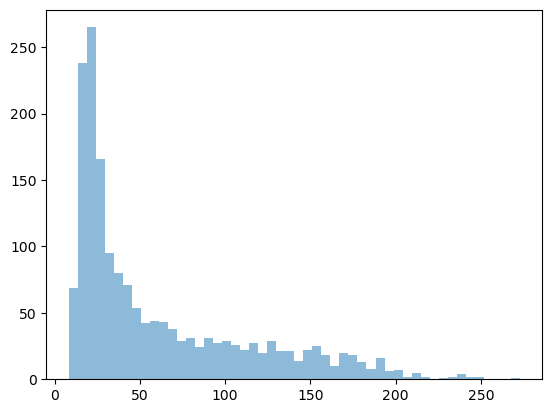

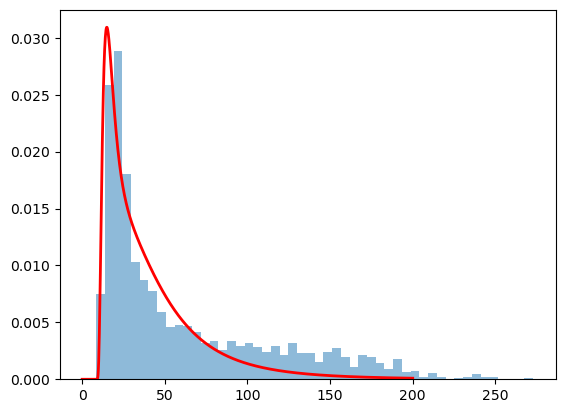

R-squared value: 0.8886911770453114
50
51
percentage of AB, percentage of EV
[40.9750033067108, 59.02499669328919]


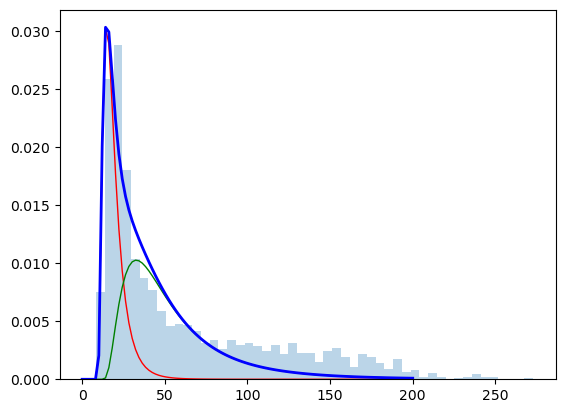

the number of single cd9 positive ev after removing ab aggregates are
1027.0349424632318
1740


In [47]:
#fit single positive channels with double positive EV distribution and AB distribution from corresponding channels
# cd9
# df=pd.read_table(r'~/Desktop/codi data/troubleshooting/20230407 ev profiler kit/oni ev cd9 cd81/wash twice/1.csv')
#df=pd.read_table(r'~/Desktop/codi data/troubleshooting/20230421 tim4 sonicate ab d10/ab/20230421 tim4 oni ev ab 2.csv')


rslt_df = df1[(df1['Channel 1 binned counts'] < 3 )& (df1['Channel 2 binned counts'] >= 3)]  #channel 2 positive
radius = rslt_df['radius_of_gyration']
print('interested particle numbers for channel 2/CD9 single positive')
print(len(radius))
print('median radius of interested particle numbers')
print(radius.median())


data=radius
bins=50
hist, bin_edges = np.histogram(data, bins, density=True)

p0=[0.1,0.1]

print(mu1, sigma1,loc1,mu2, sigma2,loc2)

params, cov = curve_fit(lognorm_2amp, (bin_edges[0:-1]+bin_edges[1:])/2,hist, p0=p0, 
                        bounds=((0.1, 0.1), (100, 100)),
                        maxfev=500000)
print('amp1, mu1, sigma1,loc1, amp2, mu2, sigma2,loc2')
print(params)
#print(cov)
# Plot the fitted distribution
x = np.linspace(0, 200, 1000)
plt.hist(data, bins, density=False, alpha=0.5)
plt.show()
plt.hist(data, bins, density=True, alpha=0.5)
#plt.plot(x, lognorm_mixture(x, *params), 'r-', lw=2)
plt.plot(x, lognorm_2amp(x, *params), 'r-', lw=2)
plt.show()

#Evaluate the fit using the R-squared value

residuals = hist - lognorm_2amp((bin_edges[0:-1]+bin_edges[1:])/2, *params)
ss_res = np.sum(residuals**2)
ss_tot = np.sum((hist - np.mean(hist))**2)
r_squared = 1 - (ss_res / ss_tot)
print("R-squared value:", r_squared)


# show plot
plt.show()
print(len(hist))
print(len(bin_edges))
plt.hist(data, bins, density=True, alpha=0.3)
# plt.scatter(bin_edges[1:],hist)

lognorm_dist1 = stats.lognorm(sigma1, loc=loc1, scale=np.exp(mu1))
lognorm_dist2 = stats.lognorm(sigma2, loc=loc2, scale=np.exp(mu2))

amp1= params[0]
amp2=params[1]
#print([amp1,amp2])

x = np.linspace(0, 200, 100)
y1 = amp1*lognorm_dist1.pdf(x)
sum_y1=sum(y1)
y2 = amp2*lognorm_dist2.pdf(x)
sum_y2=sum(y1)

percent1 = sum(y1) / (sum(y1)+sum(y2)) * 100
percent2 = sum(y2) / (sum(y1)+sum(y2)) * 100
print('percentage of AB, percentage of EV')
print([percent1,percent2])
plt.plot(x, amp1*lognorm_dist1.pdf(x), 'r-', lw=1)
plt.plot(x, amp2*lognorm_dist2.pdf(x), 'g-', lw=1)
plt.plot(x, lognorm_2amp(x, *params), 'b-', lw=2)
plt.show()
print('the number of single cd9 positive ev after removing ab aggregates are')
print(len(radius)*percent2/100)
print(len(radius))


In [48]:
# add more bins from 0-50, and less bins after 50

50
26


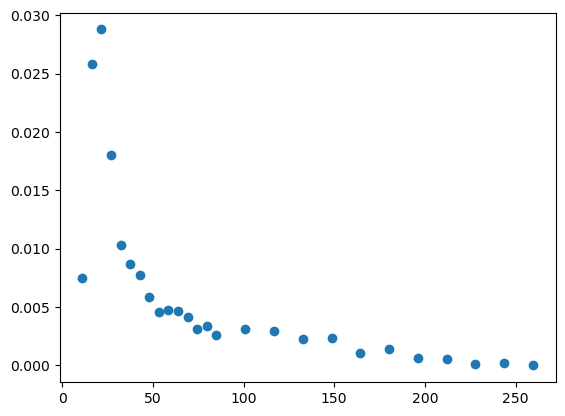

2.183720863811113 0.6060844144443146 8.59789773819343 3.5573158332287274 0.7152723310559007 11.665251062946393
amp1, mu1, sigma1,loc1, amp2, mu2, sigma2,loc2
[0.34550656 0.48636005]


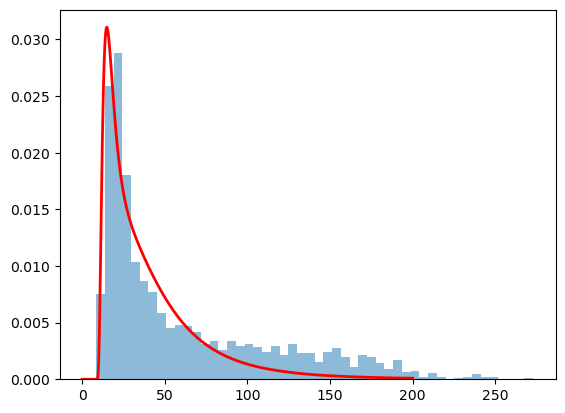

R-squared value: 0.8963750007002766


In [49]:
x_array=(bin_edges[0:-1]+bin_edges[1:])/2
print(len(x_array))
x_adjust=[]
y_adjust=[]
i=0
while i < len(x_array):
#     print(len(x_array))
    if x_array[i]<80:
        x_adjust.append(x_array[i])
        y_adjust.append(hist[i])
        i+=1
    else:
        x_adjust.append(x_array[i])
        y_adjust.append(hist[i])
        i+=3
print(len(y_adjust))
plt.scatter(x_adjust,y_adjust)
plt.show()

p0=[0.1,0.1]

print(mu1, sigma1,loc1,mu2, sigma2,loc2)

params, cov = curve_fit(lognorm_2amp, x_adjust,y_adjust, p0=p0, 
                        bounds=((0.1, 0.1), (100, 100)),
                        maxfev=500000)
print('amp1, mu1, sigma1,loc1, amp2, mu2, sigma2,loc2')
print(params)
#print(cov)
# Plot the fitted distribution
x = np.linspace(0, 200, 1000)

plt.hist(data, bins, density=True, alpha=0.5)
#plt.plot(x, lognorm_mixture(x, *params), 'r-', lw=2)
plt.plot(x, lognorm_2amp(x, *params), 'r-', lw=2)
plt.show()

#Evaluate the fit using the R-squared value

residuals = y_adjust - lognorm_2amp(x_adjust, *params)
ss_res = np.sum(residuals**2)
ss_tot = np.sum((y_adjust - np.mean(y_adjust))**2)
r_squared = 1 - (ss_res / ss_tot)
print("R-squared value:", r_squared)




50
51
percentage of AB, percentage of EV
[41.72851527921041, 58.27148472078959]


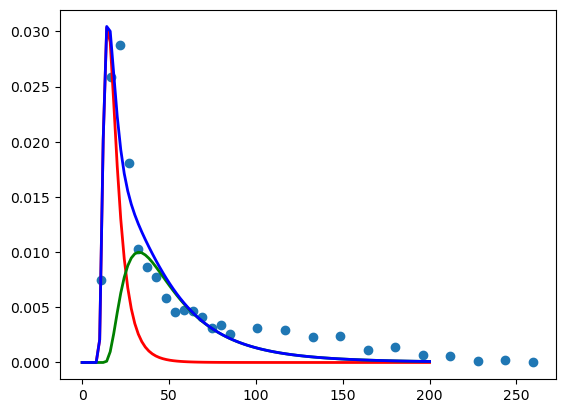

In [50]:
print(len(hist))
print(len(bin_edges))
plt.scatter(x_adjust,y_adjust)

lognorm_dist1 = stats.lognorm(sigma1, loc=loc1, scale=np.exp(mu1))
lognorm_dist2 = stats.lognorm(sigma2, loc=loc2, scale=np.exp(mu2))

amp1= params[0]
amp2=params[1]
#print([amp1,amp2])

x = np.linspace(0, 200, 100)
y1 = amp1*lognorm_dist1.pdf(x)
sum_y1=sum(y1)
y2 = amp2*lognorm_dist2.pdf(x)
sum_y2=sum(y1)

percent1 = sum(y1) / (sum(y1)+sum(y2)) * 100
percent2 = sum(y2) / (sum(y1)+sum(y2)) * 100
print('percentage of AB, percentage of EV')
print([percent1,percent2])
plt.plot(x, amp1*lognorm_dist1.pdf(x), 'r-', lw=2)
plt.plot(x, amp2*lognorm_dist2.pdf(x), 'g-', lw=2)
plt.plot(x, lognorm_2amp(x, *params), 'b-', lw=2)
plt.show()


interested particle numbers for channel 1/cd81 single positive
2990
median radius of interested particle numbers
30.949513500000002
2.183720863811113 0.6060844144443146 8.59789773819343 3.5573158332287274 0.7152723310559007 11.665251062946393
amp1, mu1, sigma1,loc1, amp2, mu2, sigma2,loc2
[0.28980103 0.80194452]


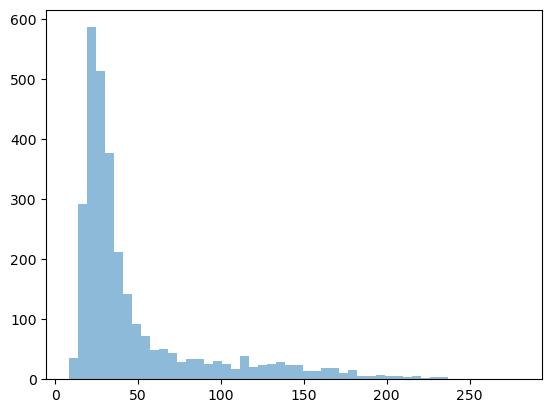

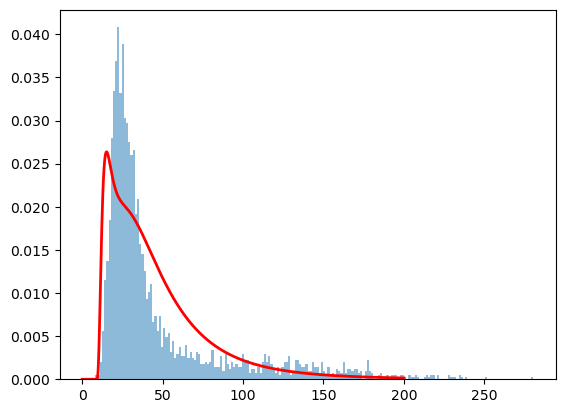

R-squared value: 0.7698809379295677
50
51
percentage of AB, percentage of EV
[26.70120598664379, 73.2987940133562]
the number of single cd81 positive ev after removing ab aggregates are
2191.6339409993507
2990


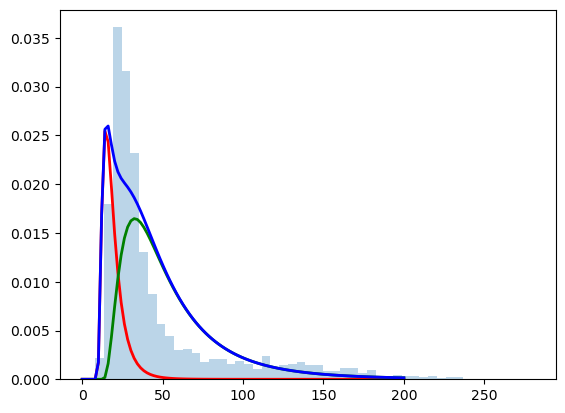

In [51]:
# for CD81

#fit single positive channels with double positive EV distribution and AB distribution from corresponding channels

# df=pd.read_table(r'~/Desktop/codi data/troubleshooting/20230407 ev profiler kit/oni ev cd9 cd81/wash twice/1.csv')
#df=pd.read_table(r'~/Desktop/codi data/troubleshooting/20230421 tim4 sonicate ab d10/ab/20230421 tim4 oni ev ab 2.csv')


rslt_df = df1[(df1['Channel 1 binned counts'] >= 3 )& (df1['Channel 2 binned counts'] < 3)]  #channel 1 positive
radius = rslt_df['radius_of_gyration']
print('interested particle numbers for channel 1/cd81 single positive')
print(len(radius))
print('median radius of interested particle numbers')
print(radius.median())

data=radius
bins=50
hist, bin_edges = np.histogram(data, bins, density=True)

p0=[0.1,0.1]

print(mu1, sigma1,loc1,mu2, sigma2,loc2)

params, cov = curve_fit(lognorm_2amp, (bin_edges[0:-1]+bin_edges[1:])/2,hist, p0=p0, 
                        bounds=((0.1, 0.1), (100, 100)),
                        maxfev=500000)
print('amp1, mu1, sigma1,loc1, amp2, mu2, sigma2,loc2')
print(params)
#print(cov)
# Plot the fitted distribution
x = np.linspace(0, 200, 1000)
plt.hist(data, bins, density=False, alpha=0.5)
plt.show()
plt.hist(data, bins*4, density=True, alpha=0.5)
#plt.plot(x, lognorm_mixture(x, *params), 'r-', lw=2)
plt.plot(x, lognorm_2amp(x, *params), 'r-', lw=2)
plt.show()

#Evaluate the fit using the R-squared value

residuals = hist - lognorm_2amp((bin_edges[0:-1]+bin_edges[1:])/2, *params)
ss_res = np.sum(residuals**2)
ss_tot = np.sum((hist - np.mean(hist))**2)
r_squared = 1 - (ss_res / ss_tot)
print("R-squared value:", r_squared)


# show plot
plt.show()
print(len(hist))
print(len(bin_edges))
# plt.scatter(bin_edges[1:],hist)

lognorm_dist1 = stats.lognorm(sigma1, loc=loc1, scale=np.exp(mu1))
lognorm_dist2 = stats.lognorm(sigma2, loc=loc2, scale=np.exp(mu2))

amp1= params[0]
amp2=params[1]
#print([amp1,amp2])

x = np.linspace(0, 200, 100)
y1 = amp1*lognorm_dist1.pdf(x)
sum_y1=sum(y1)
y2 = amp2*lognorm_dist2.pdf(x)
sum_y2=sum(y1)

percent1 = sum(y1) / (sum(y1)+sum(y2)) * 100
percent2 = sum(y2) / (sum(y1)+sum(y2)) * 100
print('percentage of AB, percentage of EV')
print([percent1,percent2])
plt.hist(data, bins, density=True, alpha=0.3)
plt.plot(x, amp1*lognorm_dist1.pdf(x), 'r-', lw=2)
plt.plot(x, amp2*lognorm_dist2.pdf(x), 'g-', lw=2)
plt.plot(x, lognorm_2amp(x, *params), 'b-', lw=2)
print('the number of single cd81 positive ev after removing ab aggregates are')
print(len(radius)*percent2/100)
print(len(radius))


50
26


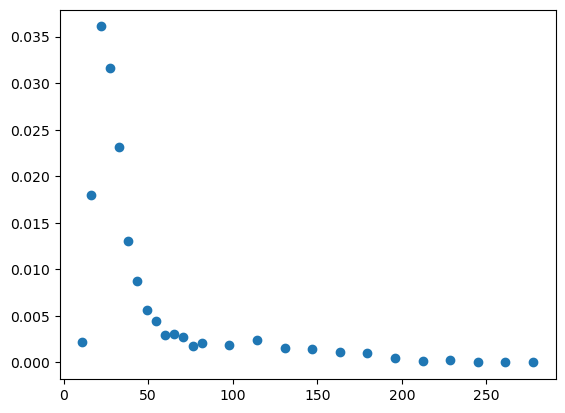

2.183720863811113 0.6060844144443146 8.59789773819343 3.5573158332287274 0.7152723310559007 11.665251062946393
amp1, mu1, sigma1,loc1, amp2, mu2, sigma2,loc2
[0.28927863 0.80590601]


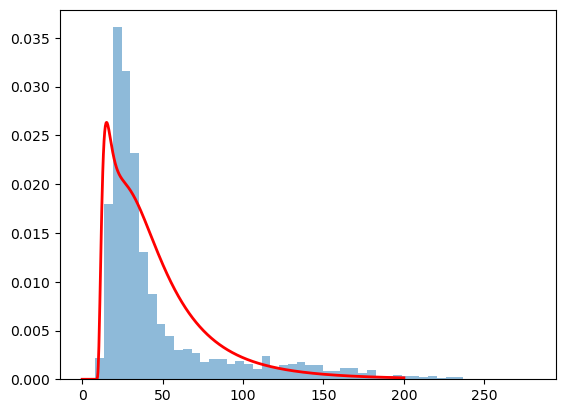

R-squared value: 0.7346043576422641


In [52]:
x_array=(bin_edges[0:-1]+bin_edges[1:])/2
print(len(x_array))
x_adjust=[]
y_adjust=[]
i=0
while i < len(x_array):
#     print(len(x_array))
    if x_array[i]<80:
        x_adjust.append(x_array[i])
        y_adjust.append(hist[i])
        i+=1
    else:
        x_adjust.append(x_array[i])
        y_adjust.append(hist[i])
        i+=3
print(len(y_adjust))
plt.scatter(x_adjust,y_adjust)
plt.show()

p0=[0.1,0.1]

print(mu1, sigma1,loc1,mu2, sigma2,loc2)

params, cov = curve_fit(lognorm_2amp, x_adjust,y_adjust, p0=p0, 
                        bounds=((0.1, 0.1), (100, 100)),
                        maxfev=500000)
print('amp1, mu1, sigma1,loc1, amp2, mu2, sigma2,loc2')
print(params)
#print(cov)
# Plot the fitted distribution
x = np.linspace(0, 200, 1000)

plt.hist(data, bins, density=True, alpha=0.5)
#plt.plot(x, lognorm_mixture(x, *params), 'r-', lw=2)
plt.plot(x, lognorm_2amp(x, *params), 'r-', lw=2)
plt.show()

#Evaluate the fit using the R-squared value

residuals = y_adjust - lognorm_2amp(x_adjust, *params)
ss_res = np.sum(residuals**2)
ss_tot = np.sum((y_adjust - np.mean(y_adjust))**2)
r_squared = 1 - (ss_res / ss_tot)
print("R-squared value:", r_squared)




50
51
percentage of AB, percentage of EV
[26.569657946379877, 73.43034205362012]


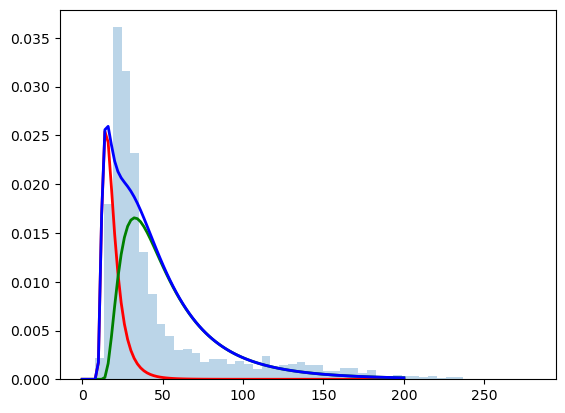

In [53]:
print(len(hist))
print(len(bin_edges))
# plt.scatter(x_adjust,y_adjust)

lognorm_dist1 = stats.lognorm(sigma1, loc=loc1, scale=np.exp(mu1))
lognorm_dist2 = stats.lognorm(sigma2, loc=loc2, scale=np.exp(mu2))

amp1= params[0]
amp2=params[1]
#print([amp1,amp2])

x = np.linspace(0, 200, 100)
y1 = amp1*lognorm_dist1.pdf(x)
sum_y1=sum(y1)
y2 = amp2*lognorm_dist2.pdf(x)
sum_y2=sum(y1)

percent1 = sum(y1) / (sum(y1)+sum(y2)) * 100
percent2 = sum(y2) / (sum(y1)+sum(y2)) * 100
print('percentage of AB, percentage of EV')
print([percent1,percent2])
plt.hist(data, bins, density=True, alpha=0.3)
plt.plot(x, amp1*lognorm_dist1.pdf(x), 'r-', lw=2)
plt.plot(x, amp2*lognorm_dist2.pdf(x), 'g-', lw=2)
plt.plot(x, lognorm_2amp(x, *params), 'b-', lw=2)
plt.show()
